In [1]:
import matplotlib.pyplot as plt
# import matplotlib.cm as mcm
import numpy as np
import pandas as pd

from arke.cart import lcc_map, label_map

from common_defs import toponyms
from plot_utils import LCC_KW, trans
import mypaths

from octant.core import TrackRun, OctantTrack, TrackSettings
import octant
octant.__version__

'0.0.11'

In [2]:
plt.style.use('paperfig.mplstyle')

In [3]:
dset_name = 'era5'

In [4]:
TR = TrackRun()
TR.data = OctantTrack.from_mux_df(pd.read_parquet(mypaths.procdir / f'{dset_name}_run000_2008_2017_top10.parquet', engine='pyarrow'))
TR.conf = TrackSettings(list((mypaths.trackresdir / dset_name / f'run000' / '2008_2009').glob('*.conf'))[0])

In [5]:
TR.conf.extent

[-20, 50, 65, 85]

In [6]:
LCC_KW['extent'] = [-25, 55, 60, 85]
LCC_KW['ticks'] = [10, 5]
# color = '#780000'
color = 'C0'

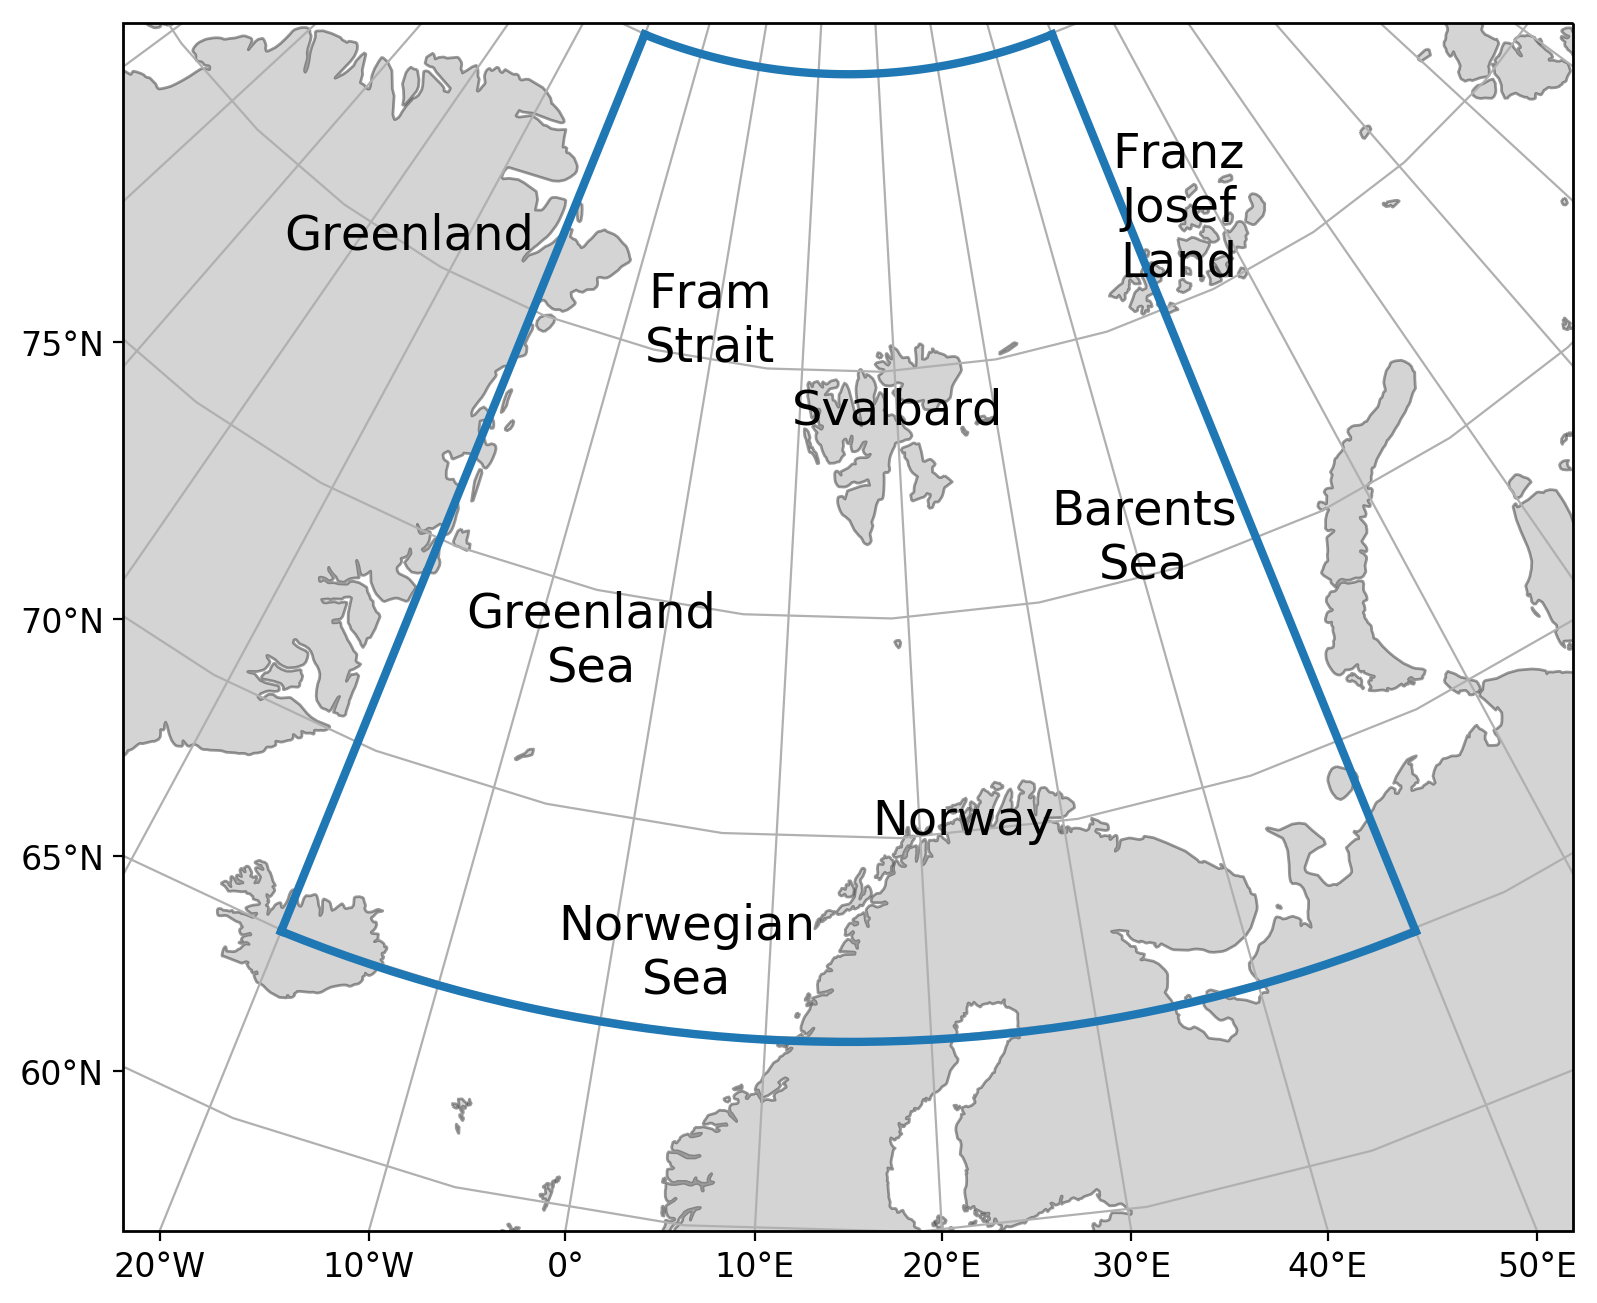

In [8]:
fig = plt.figure()

ax = lcc_map(fig, **LCC_KW)

for i in range(2):
    lon = np.linspace(TR.conf.extent[0], TR.conf.extent[1])
    lat = np.ones_like(lon) * TR.conf.extent[i+2]
    ax.plot(lon, lat, color=color, linewidth=3, **trans)

    lat = np.linspace(TR.conf.extent[2], TR.conf.extent[3])
    lon = np.ones_like(lat) * TR.conf.extent[i]
    ax.plot(lon, lat, color=color, linewidth=3, **trans)

label_map(ax, toponyms, **trans, fontsize='x-large', ha='center')

In [9]:
fig.savefig(mypaths.plotdir / f'pmctrack_domain')